In [7]:
from datasets import load_dataset, Dataset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = load_dataset("mprzymus/osm_tiles_large")
ds: Dataset = ds["train"]
ds

Found cached dataset parquet (/home/marcin/.cache/huggingface/datasets/mprzymus___parquet/mprzymus--osm_tiles_large-956ebe469af8d4e5/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'aeroway_aerodrome', 'aeroway_apron', 'aeroway_gate', 'aeroway_hangar', 'aeroway_helipad', 'aeroway_heliport', 'aeroway_navigationaid', 'aeroway_runway', 'aeroway_taxiway', 'aeroway_terminal', 'aeroway_windsock', 'amenity_animal_boarding', 'amenity_animal_breeding', 'amenity_animal_shelter', 'amenity_arts_centre', 'amenity_atm', 'amenity_baby_hatch', 'amenity_bank', 'amenity_bar', 'amenity_bbq', 'amenity_bench', 'amenity_bicycle_parking', 'amenity_bicycle_rental', 'amenity_bicycle_repair_station', 'amenity_biergarten', 'amenity_boat_rental', 'amenity_boat_sharing', 'amenity_brothel', 'amenity_bureau_de_change', 'amenity_bus_station', 'amenity_cafe', 'amenity_car_rental', 'amenity_car_sharing', 'amenity_car_wash', 'amenity_casino', 'amenity_charging_station', 'amenity_childcare', 'amenity_cinema', 'amenity_clinic', 'amenity_clock', 'amenity_college', 'amenity_community_centre', 'amenity_conference_centre', 'amenity_courthouse', 'amenity_crematorium', 'a

In [43]:
df = ds.remove_columns("image").to_pandas()
df

,aeroway_aerodrome,aeroway_apron,aeroway_gate,aeroway_hangar,aeroway_helipad,aeroway_heliport,aeroway_navigationaid,aeroway_runway,aeroway_taxiway,aeroway_terminal,...,waterway_lock_gate,waterway_pressurised,waterway_river,waterway_riverbank,waterway_stream,waterway_tidal_channel,waterway_turning_point,waterway_water_point,waterway_waterfall,waterway_weir
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
columns_usage = (df > 0).sum()
columns_usage

aeroway_aerodrome         1762
aeroway_apron              613
aeroway_gate                91
aeroway_hangar             228
aeroway_helipad            616
                          ... 
waterway_tidal_channel       4
waterway_turning_point       4
waterway_water_point         5
waterway_waterfall         156
waterway_weir              509
Length: 725, dtype: int64

In [92]:
columns_usage.sort_values()

waterway_riverbank         0
sport_ice_stock            0
shop_drugstore             0
landuse_port               0
shop_atv                   0
                       ...  
landuse_forest         36242
natural_wood           37097
amenity_parking        45328
landuse_residential    61323
building_yes           79680
Length: 725, dtype: int64

In [45]:
records_in_rows = (df > 0).sum(axis=1)
records_in_rows.mean(), records_in_rows.median()

(12.440939537903155, 7.0)

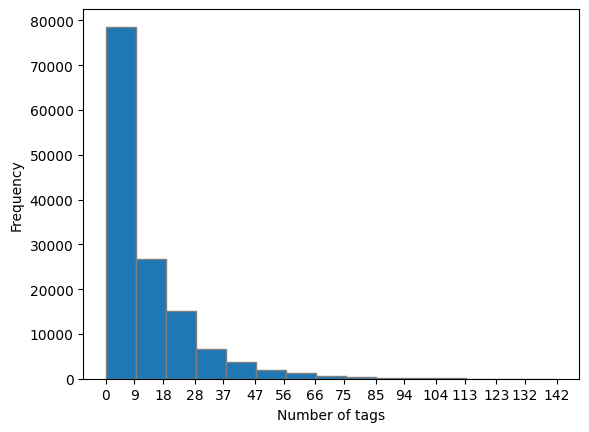

In [46]:
def make_histogram(df: pd.DataFrame, bins=15):
    n, bins, patches = plt.hist(df, edgecolor="gray", bins=bins)
    plt.ylabel("Frequency")
    plt.xlabel("Number of tags")
    plt.xticks(bins.astype(int))
    plt.show()


make_histogram(records_in_rows)

In [47]:
tags_less_than_9 = records_in_rows[records_in_rows < 9]
tags_less_than_9.agg(["mean", "median", "min"])

mean      3.469148
median    3.000000
min       0.000000
dtype: float64

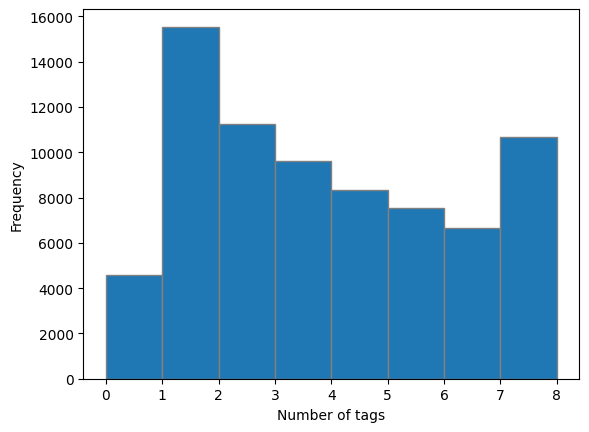

In [14]:
make_histogram(tags_less_than_9, bins=8)

In [17]:
total_objects = df.sum(axis=1)
total_objects.agg(["mean", "median", "min"])

mean      75.70753
median    25.00000
min        0.00000
dtype: float64

In [34]:
total_less_than_9 = df.iloc[tags_less_than_9.index].sum(axis=1)
total_less_than_9.agg(["mean", "median", "min"])

mean      24.645114
median     5.000000
min        0.000000
dtype: float64

In [35]:
total_less_than_9

0          2
1          4
2          5
3          4
4         12
          ..
135551    10
135552    70
135553     4
135554     3
135555     4
Length: 74145, dtype: int64

In [84]:
less_than_9_full_df = df.iloc[tags_less_than_9.index]
objects_in_less_than_9 = less_than_9_full_df.sum(axis=1)
objects_in_less_than_9.agg(["mean", "median"])

mean      24.645114
median     5.000000
dtype: float64

In [83]:
objects_in_less_than_9.value_counts().sort_index()

0        4587
1       13117
2        8831
3        5773
4        4432
        ...  
1154        1
1172        1
1204        1
1643        1
1673        1
Name: count, Length: 750, dtype: int64

In [87]:
objects_in_less_than_9.value_counts()[1] / objects_in_less_than_9.shape[0]

0.17691010857104322